## **Handwritten Greek Character Recognition**

## **Imports**

In [ ]:
import os
import numpy as np
import pandas as pd
import random
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from tabulate import tabulate

## **Convolutional Neural Network (CNN) Classification with Data Preprocessing and Evaluation**

In [ ]:
# Define the directory path
dir_path = ""

# Load training and testing data from CSV file
train_csv = np.loadtxt(os.path.join(dir_path, "train.csv"), delimiter=",")
test_csv = np.loadtxt(os.path.join(dir_path, "test.csv"), delimiter=",")

# Load training data from CSV file
X_train = train_csv[:, :-1]
X_test = test_csv[:, :-1]

# Normalize pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Extract labels from CSV files
y_train = train_csv[:, -1].astype(int)
y_test = test_csv[:, -1].astype(int)

# Split the dataset into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## **Building and Training a Convolutional Neural Network (CNN) for Grayscale Image Classification**

In [ ]:
# Reshaping image data to 14x14 grayscale images
X_train_cnn = X_train.reshape(X_train.shape[0], 14, 14, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 14, 14, 1)
X_val_cnn = X_val.reshape(X_val.shape[0], 14, 14, 1)

# Define the number of classes
num_classes = 24

# Define the number of classes
y_train_cnn = np.eye(num_classes)[y_train - 1]
y_test_cnn = np.eye(num_classes)[y_test - 1]

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=( 14, 14, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_cnn, y_train_cnn, epochs=35, batch_size=64, validation_data=(X_test_cnn, y_test_cnn), callbacks=[early_stopping])



Epoch 1/35
3/3 [==============================] - 2s 142ms/step - loss: 3.1969 - accuracy: 0.0625 - val_loss: 3.1694 - val_accuracy: 0.1250
Epoch 2/35
3/3 [==============================] - 0s 39ms/step - loss: 3.1554 - accuracy: 0.1354 - val_loss: 3.1485 - val_accuracy: 0.0521
Epoch 3/35
3/3 [==============================] - 0s 29ms/step - loss: 3.1254 - accuracy: 0.1250 - val_loss: 3.1289 - val_accuracy: 0.1250
Epoch 4/35
3/3 [==============================] - 0s 35ms/step - loss: 3.0971 - accuracy: 0.1510 - val_loss: 3.1100 - val_accuracy: 0.1667
Epoch 5/35
3/3 [==============================] - 0s 33ms/step - loss: 3.0675 - accuracy: 0.1823 - val_loss: 3.0885 - val_accuracy: 0.1979
Epoch 6/35
3/3 [==============================] - 0s 30ms/step - loss: 3.0359 - accuracy: 0.2448 - val_loss: 3.0633 - val_accuracy: 0.2292
Epoch 7/35
3/3 [==============================] - 0s 37ms/step - loss: 3.0015 - accuracy: 0.2708 - val_loss: 3.0335 - val_accuracy: 0.1979
Epoch 8/35
3/3 [==========

## **Evaluation and Metrics for CNN Model**

In [ ]:
# Predict probabilities for the validation and test sets
val_predictions_cnn = model.predict(X_val_cnn)
test_predictions_cnn = model.predict(X_test_cnn)
training_predictions_cnn = model.predict(X_train_cnn)

# Predict probabilities for the validation and test sets
threshold = 0.5
test_predictions_labels_cnn = (test_predictions_cnn > threshold).astype(int)

# Calculate and print final training accuracy
train_accuracy_cnn = history.history['accuracy'][-1]
print(f"Final Training Accuracy: {train_accuracy_cnn:.4f}")

# Calculate and print final test accuracy
test_accuracy_cnn = model.evaluate(X_test_cnn, y_test_cnn, verbose=0)[1]
print(f"Final Test Accuracy: {test_accuracy_cnn:.4f}")

# Calculate and print precision
precision_cnn =  precision_score(y_test_cnn.argmax(axis=1), test_predictions_labels_cnn.argmax(axis=1), average='weighted')
print("precision: ", precision_cnn)

# Calculate and print recall
recall_cnn = recall_score(y_test_cnn.argmax(axis=1), test_predictions_labels_cnn.argmax(axis=1), average='weighted')
print("recall", recall_cnn)

# Calculate and print recall
f1_cnn = f1_score(y_test_cnn, test_predictions_labels_cnn, average='weighted')
print("f1 score: ", f1_cnn)



6/6 [==============================] - 0s 5ms/step
Final Training Accuracy: 0.9740
Final Test Accuracy: 0.8021
precision:  0.9013888888888889
recall 0.7291666666666666
f1 score:  0.7846560846560845


## **Saving the model**

In [ ]:
model.save("")

## **Greek Character Recognition with a Pre-trained CNN Model**

1/1 [==============================] - 0s 28ms/step


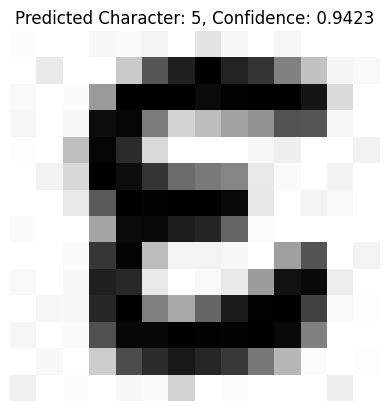

The predicted greek character is ε and number 5


In [ ]:

# Directory path for the dataset
dir_path_cnn = ""

# Load the pre-trained model
model_cnn = load_model("")

# Load the pre-trained model
def predict_with_confidence_cnn(images):
    predictions_cnn = model.predict(images)
    confidences_cnn = np.max(predictions_cnn, axis=1)
    return predictions_cnn, confidences_cnn

# Example image for prediction
example_image_cnn = X_test_cnn[17:18]
predictions_cnn, confidences_cnn = predict_with_confidence_cnn(example_image_cnn)

# Function to visualize the prediction results
def visualize_prediction_cnn(image, prediction_cnn, confidence_cnn):
    plt.imshow(image.squeeze(), cmap='gray')
    predicted_character_cnn = np.argmax(prediction_cnn) + 1
    confidence_value_cnn = confidence_cnn[0]
    plt.title(f"Predicted Character: {predicted_character_cnn}, Confidence: {confidence_value_cnn:.4f}")
    plt.axis('off')
    plt.show()

    return predicted_character_cnn

# Visualize the predicted character with confidence
predicted_character_cnn = visualize_prediction_cnn(example_image_cnn, predictions_cnn, confidences_cnn)

# Function to map character numbers to Greek characters
def get_greek_character_cnn(number):
    greek_dict_cnn = {
        1: 'α', 2: 'β', 3: 'γ', 4: 'δ', 5: 'ε', 6: 'ζ', 7: 'η', 8: 'θ', 9: 'ι', 10: 'κ',
        11: 'λ', 12: 'μ', 13: 'ν', 14: 'ξ', 15: 'ο', 16: 'π', 17: 'ρ', 18: 'σ', 19: 'τ', 20: 'υ',
        21: 'φ', 22: 'χ', 23: 'ψ', 24: 'ω'
    }

    return greek_dict_cnn.get(number, 'Unknown')
# Get the predicted Greek character
predicted_greek_character_cnn = get_greek_character_cnn(predicted_character_cnn)

# Get the predicted Greek character
print("The predicted greek character is {} and number {}".format(predicted_greek_character_cnn, predicted_character_cnn))


## **Visualizing Training and Validation Accuracy and Making Predictions with Confidence Using CNN Model**

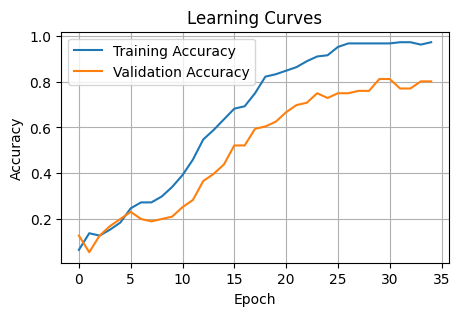

1/1 [==============================] - 0s 28ms/step
Predictions: [[3.5901630e-01 3.8002649e-06 7.1117779e-06 1.3024359e-05 8.2097904e-05
  4.3238038e-03 1.9792728e-03 6.6183885e-03 7.6287057e-07 2.2477907e-05
  4.0874456e-04 7.5981610e-05 6.3201424e-04 1.1982769e-06 4.2858967e-01
  1.9389719e-02 7.2428406e-07 3.3871946e-04 5.7374444e-05 1.2260496e-01
  7.2150410e-06 3.4320292e-06 6.5855130e-07 5.5822678e-02]]
Confidences: [0.42858967]


In [ ]:
plt.figure(figsize=(5, 3))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid()
plt.show()

# Function to Predict with Confidence using CNN Model
def predict_with_confidence_cnn(images):
    predictions_cnn = model.predict(images)
    confidences_cnn = np.max(predictions_cnn, axis=1)
    return predictions_cnn, confidences_cnn

# Example Image for Prediction
example_image_cnn = X_test_cnn[0:1]
predictions_cnn, confidences_cnn = predict_with_confidence_cnn(example_image_cnn)

# Print Predictions and Confidences
print("Predictions:", predictions_cnn)
print("Confidences:", confidences_cnn)

## **Plotting Training and Validation Loss Curves**

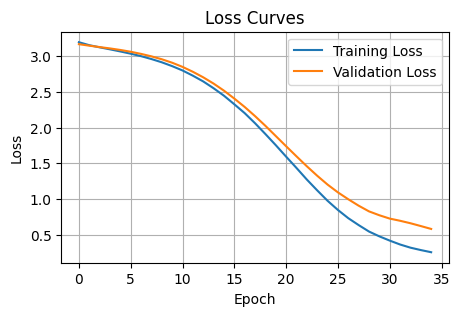

In [ ]:
# Ploting Loss curve
plt.figure(figsize=(5, 3))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.grid()
plt.show()


## **Visualizing a Confusion Matrix as a Heatmap for Convolutional Neural Network (CNN) Predictions**

3/3 [==============================] - 0s 4ms/step


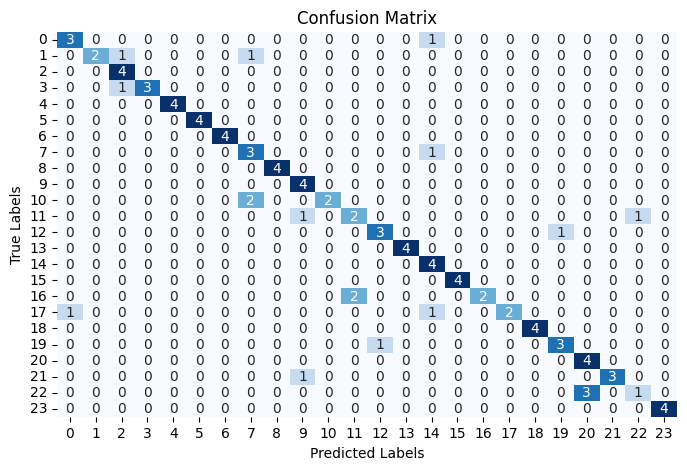

In [ ]:
# Plotting Heat map as confusion matrix
y_pred_prob_cnn = model.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_prob_cnn, axis=1)
cm_cnn = confusion_matrix(np.argmax(y_test_cnn, axis=1), y_pred_cnn)

plt.figure(figsize=(8, 5))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## **Displaying Random Samples with True Labels from the Dataset**

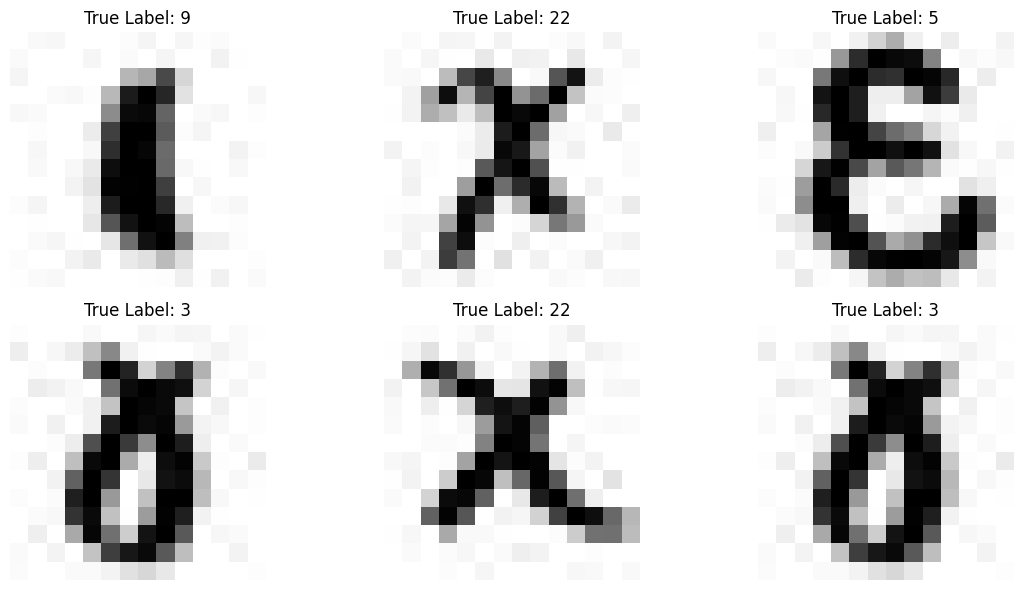

In [ ]:
# Displaying random characters from the dataset
plt.figure(figsize=(12, 6))
for i in range(6):
    index = random.randint(0, len(X_train_cnn) - 1)
    plt.subplot(2, 3, i + 1)
    plt.imshow(X_train_cnn[index].reshape(14, 14), cmap='gray')
    true_label_cnn = np.argmax(y_train_cnn[index]) + 1
    plt.title(f"True Label: {true_label_cnn}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## **Support Vector Machine (SVM) Classification with Data Preprocessing and Evaluation**

In [ ]:
# Define the path to the directory containing your data
dir_path_svm = ""

# Load training and testing data from CSV files
train_csv_svm = np.loadtxt(os.path.join(dir_path_svm, "train.csv"), delimiter=",")
test_csv_svm = np.loadtxt(os.path.join(dir_path_svm, "test.csv"), delimiter=",")

# Extract features (X) from the CSV data
X_train_svm = train_csv_svm[:, :-1]
X_test_svm = test_csv_svm[:, :-1]

# Normalizing the feature data by scaling it to the range [0, 1]
X_train_svm = X_train_svm.astype('float32') / 255
X_test_svm = X_test_svm.astype('float32') / 255

# Extract labels from CSV files
y_train_svm = train_csv_svm[:, -1].astype(int)
y_test_svm = test_csv_svm[:, -1].astype(int)

# Split the dataset into train and validation sets
X_train_svm, X_val_svm, y_train_svm, y_val_svm = train_test_split(X_train_svm, y_train_svm, test_size=0.2, random_state=42)

# Standardize the feature data by scaling it to have a mean of 0 and a standard deviation of 1
scaler_svm = StandardScaler()
X_train_svm = scaler_svm.fit_transform(X_train_svm)
X_val_svm = scaler_svm.transform(X_val_svm)
X_test_svm = scaler_svm.transform(X_test_svm)

# Standardize the feature data by scaling it to have a mean of 0 and a standard deviation of 1
svm_model = SVC(kernel='rbf', C=1, gamma='scale', probability=True)

# Train the SVM model on the training data
svm_model.fit(X_train_svm, y_train_svm)

# Make predictions on the validation and test sets
val_predictions_svm = svm_model.predict(X_val_svm)
test_predictions_svm = svm_model.predict(X_test_svm)
training_predictions_svm = svm_model.predict(X_train_svm)

# Generate a classification report for the test set predictions
class_report_svm = classification_report(y_test_svm, test_predictions_svm)
print("Classification Report:\n", class_report_svm)

# Calculate and print the validation accuracy
val_accuracy_svm = accuracy_score(y_val_svm, val_predictions_svm)
print(f"Validation Accuracy: {val_accuracy_svm:.4f}")

# Calculate and print the test accuracy
test_accuracy_svm = accuracy_score(y_test_svm, test_predictions_svm)
print(f"Test Accuracy: {test_accuracy_svm:.4f}")

# Calculate and print the training accuracy
training_accuracy_svm = accuracy_score(y_train_svm, training_predictions_svm)
print(f"Train Accuracy: {training_accuracy_svm:.4f}")

# Calculate and print the weighted precision
precision_svm = precision_score(y_test_svm, test_predictions_svm, average='weighted')
print("precision: ", precision_svm)

# Calculate and print the weighted recall
recall_svm = recall_score(y_test_svm, test_predictions_svm, average='weighted')
print("recall", recall_svm)

# Calculate and print the weighted F1 score
f1_svm = f1_score(y_test_svm, test_predictions_svm, average='weighted')
print("f1 score: ", f1_svm)




Classification Report:
               precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       1.00      0.25      0.40         4
           3       0.50      0.75      0.60         4
           4       1.00      0.75      0.86         4
           5       0.75      0.75      0.75         4
           6       0.80      1.00      0.89         4
           7       0.80      1.00      0.89         4
           8       0.67      1.00      0.80         4
           9       1.00      1.00      1.00         4
          10       0.67      0.50      0.57         4
          11       1.00      0.75      0.86         4
          12       0.60      0.75      0.67         4
          13       1.00      0.75      0.86         4
          14       1.00      0.75      0.86         4
          15       1.00      1.00      1.00         4
          16       0.33      0.75      0.46         4
          17       1.00      0.50      0.67         4
   

## **Saving the SVM Model**

In [ ]:
model.save("")

## **Greek Character Recognition Using SVM Model**

1/1 [==============================] - 0s 20ms/step


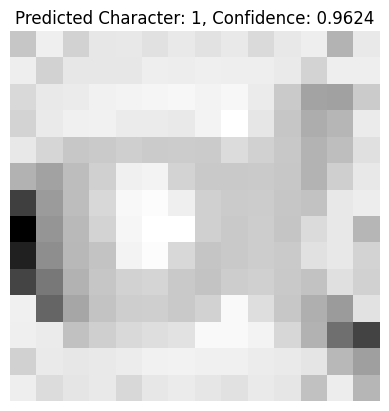

The predicted Greek character is α and number 1


In [ ]:
# Directory path for the dataset
dir_path_svm = ""

# Load the pre-trained model
model_svm = load_model("")

# Load the pre-trained model
def predict_with_confidence_svm(images):
    predictions_svm = model.predict(images)
    confidences_svm = np.max(predictions_svm, axis=1)
    return predictions_svm, confidences_svm

# Example image for prediction
example_image_svm = X_test_svm[1:2]
example_image_reshaped_svm = example_image_svm.reshape(-1, 14, 14, 1)
predictions_svm, confidences_svm = predict_with_confidence_svm(example_image_reshaped_svm)

# Function to visualize the prediction results
def visualize_prediction_svm(image, prediction_svm, confidence_svm):
    image_reshaped_svm = image.squeeze().reshape(14, 14)
    plt.imshow(image_reshaped_svm, cmap='gray')
    predicted_character_svm = np.argmax(prediction_svm) + 1
    confidence_value_svm = confidence_svm[0]
    plt.title(f"Predicted Character: {predicted_character_svm}, Confidence: {confidence_value_svm:.4f}")
    plt.axis('off')
    plt.show()

    return predicted_character_svm

# Visualize the predicted character with confidence
predicted_character_svm = visualize_prediction_svm(example_image_svm, predictions_svm, confidences_svm)

# Function to map character numbers to Greek characters
def get_greek_character_svm(number):
    greek_dict_svm = {
        1: 'α', 2: 'β', 3: 'γ', 4: 'δ', 5: 'ε', 6: 'ζ', 7: 'η', 8: 'θ', 9: 'ι', 10: 'κ',
        11: 'λ', 12: 'μ', 13: 'ν', 14: 'ξ', 15: 'ο', 16: 'π', 17: 'ρ', 18: 'σ', 19: 'τ', 20: 'υ',
        21: 'φ', 22: 'χ', 23: 'ψ', 24: 'ω'
    }

    return greek_dict_svm.get(number, 'Unknown')

# Get the predicted Greek character
predicted_greek_character_svm = get_greek_character_svm(predicted_character_svm)

# Print the predicted Greek character
print("The predicted Greek character is {} and number {}".format(predicted_greek_character_svm, predicted_character_svm))


## **Support Vector Machine (SVM) Learning Curve Analysis and Confidence-based Predictions**

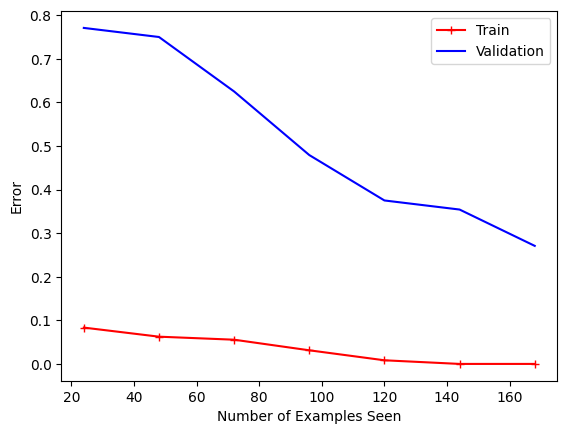

Predictions: [[0.25467884 0.01044222 0.03564439 0.04401656 0.02234443 0.0504634
  0.05214515 0.03059898 0.00808256 0.01452378 0.025759   0.07695819
  0.02250603 0.02341424 0.02846991 0.09806312 0.01074235 0.02673727
  0.02170949 0.02746334 0.02156074 0.01971631 0.01309301 0.0608667 ]]
Confidences: [0.25467884]


In [ ]:
#Function to plot learning curves
def plot_learning_curves_svm(svm_model, X_train_svm, y_train_svm, X_val_svm, y_val_svm):
    train_errors_svm, val_errors_svm = [], []
    step_size_svm = 24
    max_train_size_svm = len(X_train_svm)

    for m in range(step_size_svm, max_train_size_svm, step_size_svm):
        svm_model.fit(X_train_svm[:m], y_train_svm[:m])
        y_train_pred_svm = svm_model.predict(X_train_svm[:m])
        y_val_pred_svm = svm_model.predict(X_val_svm)
        train_errors_svm.append(1 - accuracy_score(y_train_svm[:m], y_train_pred_svm))
        val_errors_svm.append(1 - accuracy_score(y_val_svm, y_val_pred_svm))
# Plot the learning curves
    plt.plot(range(step_size_svm, max_train_size_svm, step_size_svm), train_errors_svm, "r-+", label="Train")
    plt.plot(range(step_size_svm, max_train_size_svm, step_size_svm), val_errors_svm, "b-", label="Validation")
    plt.xlabel("Number of Examples Seen")
    plt.ylabel("Error")
    plt.legend()
    plt.show()
# Call the learning curve plotting function
plot_learning_curves_svm(svm_model, X_train_svm, y_train_svm, X_val_svm, y_val_svm)

def predict_with_confidence_svm(images):
    predictions_svm = svm_model.predict_proba(images)
    confidences_svm = np.max(predictions_svm, axis=1)
    return predictions_svm, confidences_svm

example_image_svm = X_test_svm[0:1]
predictions_svm, confidence_svm = predict_with_confidence_svm(example_image_svm)
print("Predictions:", predictions_svm)
print("Confidences:", confidence_svm)


## **Visualization of Confusion Matrix for SVM Classifier**

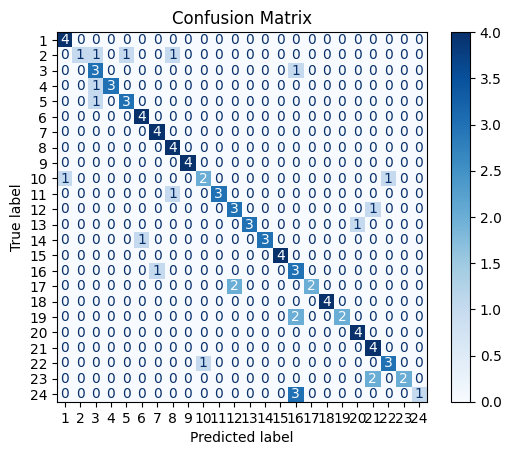

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generate the confusion matrix
conf_matrix_svm = confusion_matrix(y_test_svm, test_predictions_svm)

# Display the confusion matrix
disp_svm = ConfusionMatrixDisplay(conf_matrix_svm, display_labels=np.arange(1, 25))
disp_svm.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


## **Greek Character Recognition Using KNN Model**

In [ ]:
# Define the path to the directory containing your data
dir_path_knn = ""

# Load training and testing data from CSV files
train_csv_knn = np.loadtxt(os.path.join(dir_path, "train.csv"), delimiter=",")
test_csv_knn = np.loadtxt(os.path.join(dir_path, "test.csv"), delimiter=",")

# Extract features (X) from the CSV data
X_train_knn = train_csv_knn[:, :-1]
X_test_knn = test_csv_knn[:, :-1]

# Normalizing the feature data by scaling it to the range [0, 1]
X_train_knn = X_train_knn.astype('float32') / 255
X_test_knn = X_test_knn.astype('float32') / 255

# Extract labels from CSV files
y_train_knn = train_csv_knn[:, -1].astype(int)
y_test_knn = test_csv_knn[:, -1].astype(int)

# Split the dataset into train and validation sets
X_train_knn, X_val_knn, y_train_knn, y_val_knn = train_test_split(X_train_knn, y_train_knn, test_size=0.2, random_state=42)

# Standardize the feature data by scaling it to have a mean of 0 and a standard deviation of 1
scaler_knn = StandardScaler()
X_train_knn = scaler_knn.fit_transform(X_train_knn)
X_val_knn = scaler_knn.transform(X_val_knn)
X_test_knn = scaler_knn.transform(X_test_knn)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the SVM model on the training data
knn_model.fit(X_train_knn, y_train_knn)

# Make predictions on the validation and test sets
val_predictions_knn = knn_model.predict(X_val_knn)
test_predictions_knn = knn_model.predict(X_test_knn)
training_predictions_knn = knn_model.predict(X_train_knn)

# Generate a classification report for the test set predictions
class_report_knn = classification_report(y_test_knn, test_predictions_knn)
print("Classification Report:\n", class_report_knn)

# Calculate and print the validation accuracy
val_accuracy_knn = accuracy_score(y_val_knn, val_predictions_knn)
print(f"Validation Accuracy: {val_accuracy_knn:.4f}")

# Calculate and print the test accuracy
test_accuracy_knn = accuracy_score(y_test_knn, test_predictions_knn)
print(f"Test Accuracy: {test_accuracy_knn:.4f}")

# Calculate and print the training accuracy
training_accuracy_knn = accuracy_score(y_train_knn, training_predictions_knn)
print(f"Train Accuracy: {training_accuracy_knn:.4f}")

# Calculate and print the weighted precision
precision_knn = precision_score(y_test_knn, test_predictions_knn, average='weighted')
print("precision: ", precision_knn)

# Calculate and print the weighted recall
recall_knn = recall_score(y_test_knn, test_predictions_knn, average='weighted')
print("recall", recall_knn)

# Calculate and print the weighted F1 score
f1_knn = f1_score(y_test_knn, test_predictions_knn, average='weighted')
print("f1 score: ", f1_knn)



Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      0.50      0.67         4
           3       0.50      1.00      0.67         4
           4       1.00      0.50      0.67         4
           5       0.75      0.75      0.75         4
           6       0.50      0.25      0.33         4
           7       0.80      1.00      0.89         4
           8       0.67      1.00      0.80         4
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4
          11       0.67      0.50      0.57         4
          12       1.00      0.75      0.86         4
          13       1.00      0.75      0.86         4
          14       0.60      0.75      0.67         4
          15       0.50      1.00      0.67         4
          16       1.00      0.25      0.40         4
          17       1.00      1.00      1.00         4
   

## **Saving the KNN Model**

In [ ]:
model.save("")

## **Greek Character Recognition with K-Nearest Neighbors (KNN) Model**

1/1 [==============================] - 0s 61ms/step


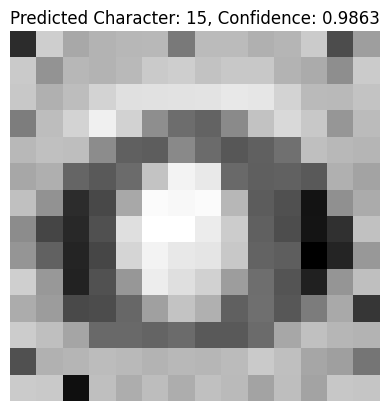

The predicted Greek character is ο and number 15


In [ ]:
# Directory path for the dataset
dir_path_knn = ""

# Load the pre-trained model
model_knn = load_model("")

# Load the pre-trained model
def predict_with_confidence_knn(images):
    predictions_knn = model_knn.predict(images)
    confidences_knn = np.max(predictions_knn, axis=1)
    return predictions_knn, confidences_knn

# Example image for prediction
example_image_knn = X_test_knn[57:58]
example_image_reshaped_knn = example_image_knn.reshape(-1, 14, 14, 1)

predictions_knn, confidences_knn = predict_with_confidence_knn(example_image_reshaped_knn)

# Function to visualize the prediction results
def visualize_prediction_knn(image, prediction_knn, confidence_knn):
    image_reshaped_knn = image.squeeze().reshape(14, 14)

    plt.imshow(image_reshaped_knn, cmap='gray')
    predicted_character_knn = np.argmax(prediction_knn) + 1
    confidence_value_knn = confidence_knn[0]
    plt.title(f"Predicted Character: {predicted_character_knn}, Confidence: {confidence_value_knn:.4f}")
    plt.axis('off')
    plt.show()

    return predicted_character_knn

# Visualize the predicted character with confidence
predicted_character_knn = visualize_prediction_knn(example_image_knn, predictions_knn, confidences_knn)

# Function to map character numbers to Greek characters
def get_greek_character_knn(number):
    greek_dict_knn = {
        1: 'α', 2: 'β', 3: 'γ', 4: 'δ', 5: 'ε', 6: 'ζ', 7: 'η', 8: 'θ', 9: 'ι', 10: 'κ',
        11: 'λ', 12: 'μ', 13: 'ν', 14: 'ξ', 15: 'ο', 16: 'π', 17: 'ρ', 18: 'σ', 19: 'τ', 20: 'υ',
        21: 'φ', 22: 'χ', 23: 'ψ', 24: 'ω'
    }

    return greek_dict_knn.get(number, 'Unknown')

# Get the predicted Greek character
predicted_greek_character_knn = get_greek_character_knn(predicted_character_knn)

# Print the predicted Greek character
print("The predicted Greek character is {} and number {}".format(predicted_greek_character_knn, predicted_character_knn))


## **Exploring Learning Curves and Confidence-based Predictions with k-Nearest Neighbors (KNN) Classifier**

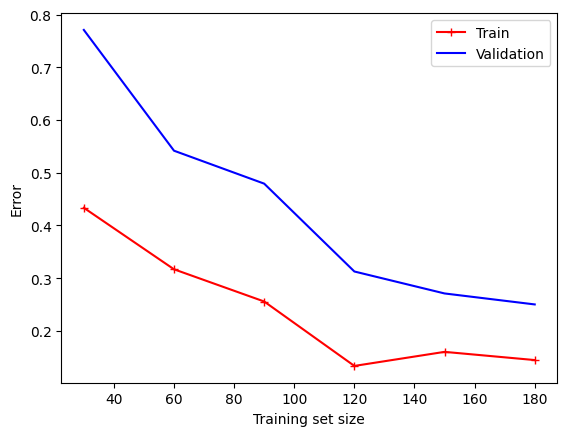

Predictions: [2]
Confidences: [0.6]


In [ ]:
# Function to plot learning curves
def plot_learning_curves_knn(knn_model, X_train_knn, y_train_knn, X_val_knn, y_val_knn):
    # Initialize lists to store training and validation errors
    train_errors_knn, val_errors_knn = [], []
    # Loop through different training set sizes
    for m in range(30, len(X_train_knn), 30):
        knn_model.fit(X_train_knn[:m], y_train_knn[:m])
        # Predict labels for the subset of training data and validation data
        y_train_pred_knn = knn_model.predict(X_train_knn[:m])
        y_val_pred_knn = knn_model.predict(X_val_knn)
        # Predict labels for the subset of training data and validation data
        train_errors_knn.append(1 - accuracy_score(y_train_knn[:m], y_train_pred_knn))
        val_errors_knn.append(1 - accuracy_score(y_val_knn, y_val_pred_knn))

    # Plot the learning curves
    plt.plot(range(30, len(X_train), 30), train_errors_knn, "r-+", label="Train")
    plt.plot(range(30, len(X_train), 30), val_errors_knn, "b-", label="Validation")
    plt.xlabel("Training set size")
    plt.ylabel("Error")
    plt.legend()
    plt.show()

# Plot the learning curves
plot_learning_curves_knn(knn_model, X_train_knn, y_train, X_val_knn, y_val)

# Function to predict with confidence
def predict_with_confidence_knn(images):
    distances_knn, indices_knn = knn_model.kneighbors(images)
    nearest_labels_knn = y_train[indices_knn]
    class_counts_knn = np.apply_along_axis(np.bincount, axis=1, arr=nearest_labels_knn, minlength=24)
    predictions_knn = class_counts_knn.argmax(axis=1) + 1
    confidences_knn = class_counts_knn.max(axis=1) / knn_model.n_neighbors
    return predictions_knn, confidences_knn

# Example image for prediction
example_image_knn = X_test_knn[0:1]
predictions_knn, confidence_knn = predict_with_confidence_knn(example_image_knn)
# Print the predictions and confidences
print("Predictions:", predictions_knn)
print("Confidences:", confidence_knn)


## **Visualizing the Confusion Matrix for K-Nearest Neighbors Classifier**

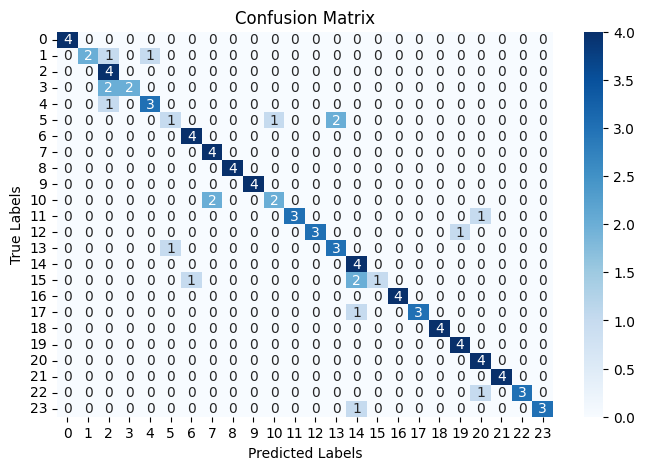

In [ ]:
# Create a confusion matrix
conf_matrix_knn = confusion_matrix(y_test_knn, test_predictions_knn)
plt.figure(figsize=(8, 5))
# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
# Display the plot
plt.show()


# Comparative Analysis

In [ ]:
# Load the saved CNN model
cnn_model = load_model("")

# Load the saved SVM model
svm_model = load_model("")

# Load the saved KNN model
knn_model = load_model("")

# Gather accuracy values for each model
model_names = ['CNN', 'SVM', 'KNN']
training_accuracies = [history.history['accuracy'][-1], training_accuracy_svm, training_accuracy_knn]
validation_accuracies = [history.history['val_accuracy'][-1], val_accuracy_svm, val_accuracy_knn]


## **Code for Evaluating and Comparing Model Accuracies using PrettyTable**

In [ ]:
from prettytable import PrettyTable
# Evaluate the CNN model on test data
test_accuracy_cnn = accuracy_score(np.argmax(y_test_cnn, axis=1), np.argmax(test_predictions_cnn, axis=1))

# Evaluate the SVM model on test data
test_accuracy_svm = accuracy_score(y_test_svm, test_predictions_svm)

# Evaluate the KNN model on test data
test_accuracy_knn = accuracy_score(y_test, test_predictions_knn)
testing_accuracies= [test_accuracy_cnn, test_accuracy_svm, test_accuracy_knn]

# Round the accuracy values to 4 decimal places
training_accuracies = [round(train_acc, 4) if train_acc is not None else None for train_acc in training_accuracies]
validation_accuracies = [round(val_acc, 4) if val_acc is not None else None for val_acc in validation_accuracies]
testing_accuracies = [round(test_acc, 4) for test_acc in testing_accuracies]

# Create a comparison table using pandas
comparison_table = pd.DataFrame({
    'Model': model_names,
    'Training Accuracy': training_accuracies,
    'Validation Accuracy': validation_accuracies,
    'Testing Accuracy': testing_accuracies
})

# Create a comparison table using PrettyTable
table = PrettyTable()
table.field_names = ["Model", "Training Accuracy", "Validation Accuracy", "Testing Accuracy"]
for model_name, train_acc, val_acc, test_acc in zip(model_names, training_accuracies, validation_accuracies, testing_accuracies):
    table.add_row([model_name, train_acc, val_acc, test_acc])


# Display the table with borders
print(table)

+-------+-------------------+---------------------+------------------+
| Model | Training Accuracy | Validation Accuracy | Testing Accuracy |
+-------+-------------------+---------------------+------------------+
|  CNN  |       0.974       |        0.8021       |      0.8021      |
|  SVM  |        1.0        |        0.7917       |      0.7604      |
|  KNN  |       0.875       |        0.7292       |      0.8021      |
+-------+-------------------+---------------------+------------------+


## **Comparing Test Accuracies of Machine Learning Models Using a Bar Graph**

In [ ]:
# Define the models and their corresponding precision, recall, and f1 score
models = ['KNN', 'SVM', 'CNN']
precision_scores = [precision_knn, precision_svm, precision_cnn]
recall_scores = [recall_knn, recall_svm, recall_cnn]
f1_scores = [f1_knn, f1_svm, f1_cnn]

# Create a table for precision, recall, and f1 scores
scores_table = tabulate(zip(models, precision_scores, recall_scores, f1_scores),
                        headers=['Model', 'Precision', 'Recall', 'F1 Score'], tablefmt='grid')

# Print the table
print("Precision, Recall, and F1 Scores:")
print(scores_table)


Precision, Recall, and F1 Scores:
+---------+-------------+----------+------------+
| Model   |   Precision |   Recall |   F1 Score |
+=========+=============+==========+============+
| KNN     |    0.852083 | 0.802083 |   0.793816 |
+---------+-------------+----------+------------+
| SVM     |    0.834921 | 0.760417 |   0.754626 |
+---------+-------------+----------+------------+
| CNN     |    0.901389 | 0.729167 |   0.784656 |
+---------+-------------+----------+------------+
